## Step 1 Construct features using NLTK

In [1]:
import nltk
from nltk.corpus import stopwords
import string
import json

%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from __future__ import division

randomState = np.random.seed(2)


# Import works.json: title, words, sentences of 38 pieces
with open('works_v1028.json', 'r') as f:
    try:
        works = json.load(f)
    # if the file is empty the ValueError will be thrown
    except ValueError:
        works = {}


In [2]:
from nltk import FreqDist

def getFreqDist(words):
    nltk_text = nltk.Text(words)
    
    return FreqDist(nltk_text)


In [3]:
def getCountFrequency(words, freq):
    nltk_text = nltk.Text(words)
    freq_dist = FreqDist(nltk_text)
    
    count = 0
    for key,value in freq_dist.items():
        if value == freq:
            count += 1
    
    return count    

def getHapaxLegomena(words):
    return getCountFrequency(words, 1)



In [4]:
def getDisLegomena(words):
    return getCountFrequency(words, 2)


In [5]:
def getNumberUniqueWords(words):
    return len(getFreqDist(words))


In [6]:
def getWordLengthDistribution(words):
    result = FreqDist()
    for w in words:        
        result[len(w)] += 1
    
    return result

def printFreqDist(freq_dist):
    for key,value in freq_dist.items():
        print (key,value)    


In [7]:
def getSentenceLengthDistribution(sents):
    result = FreqDist()
    for s in sents:        
        result[len(s)] += 1
    
    return result   



In [8]:
def getAverageSentenceLength(words_all, sents):
    
    return len(words_all)/len(sents)


In [9]:
def getPronounDistribution(sents):
    result = FreqDist()
    pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'thou', 'ye']
    for s in sents:
        count = 0
        for p in pronouns:
            count += s.count(p)
        result[count] += 1
    
    return result

In [10]:
def getNumberOfPronoun(words):
    pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'thou', 'ye']
    count = 0
         
    for p in pronouns:
        count += words.count(p)
    
    return count

In [11]:
def getConjunctionDistribution(sents):
    result = FreqDist()
    conjunctions = ['for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'after', 'although', 'as', 'because', 'before', 'if',
                'once', 'since', 'though', 'unless', 'until', 'when', 'where', 'while', 'whether', 'either', 'neither',
                'as', 'than', 'even', 'then', 'lest', 'rather', 'which', 'who', 'why', 'that', 'till']
    for s in sents:
        count = 0
        for c in conjunctions:
            count += s.count(c)
        result[count] += 1
    
    return result


In [12]:
def getNumberOfConjunction(words):
    count = 0
    conjunctions = ['for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'after', 'although', 'as', 'because', 'before', 'if',
                'once', 'since', 'though', 'unless', 'until', 'when', 'where', 'while', 'whether', 'either', 'neither',
                'as', 'than', 'even', 'then', 'lest', 'rather', 'which', 'who', 'why', 'that', 'till']

    for c in conjunctions:
        count += words.count(c)
    
    return count

In [13]:
def getNumberOfComma(text):
    return text.count(",")

def getNumberOfDots(text):
    return text.count(".")

def getNumberOfStringList(words, string_list):
    count = 0
    
    for c in string_list:
        count += words.count(c)
    
    return count

def getNumberOfThe(words):
    string_list = ['a', 'an', 'the']
    
    return getNumberOfStringList(words, string_list)

def getNumberOfIn(words):
    string_list = ['in', 'on', 'to', 'of']
    
    return getNumberOfStringList(words, string_list)

def getNumberOfIs(words):
    string_list = ['is', 'are', 'was', 'were']
    
    return getNumberOfStringList(words, string_list)


In [14]:
# Create a feature table for all acts
# Currently only has some simple features

featureTable = {}

featureTable = {'act': [], 'filename': [], 'HapaxLegomena': [], 'DisLegomena': [], 
                'numberUniqueWords': [], 'averageSentenceLength': [], 'numberOfSentences': [],
                'numberOfPronoun': [], 'numberOfConjunction': [], 'numberOfComma': [], 'numberOfDots': [],
                'numberOfThe': [], 'numberOfIn': [], 'numberOfIs': []}


for act, content in works.items():
    words_nonStemmed = content['words_nonStemmed']
    words_all = content['words_all']
    sentences = content['sentences']
    # Normalize by number of all words
    normalizer = len(words_all)
    featureTable['act'].append(act)
    featureTable['filename'].append(content['filename'])
    featureTable['HapaxLegomena'].append(getHapaxLegomena(words_nonStemmed)/normalizer)
    featureTable['DisLegomena'].append(getDisLegomena(words_nonStemmed)/normalizer)
    featureTable['numberUniqueWords'].append(getNumberUniqueWords(words_nonStemmed)/normalizer)
    featureTable['averageSentenceLength'].append(getAverageSentenceLength(words_all, sentences))
    featureTable['numberOfSentences'].append(len(sentences))
    featureTable['numberOfPronoun'].append(getNumberOfPronoun(words_all)/normalizer)
    featureTable['numberOfConjunction'].append(getNumberOfConjunction(words_all)/normalizer)
    featureTable['numberOfComma'].append(getNumberOfComma(content['text'])/normalizer)
    featureTable['numberOfDots'].append(getNumberOfDots(content['text'])/normalizer)
    featureTable['numberOfThe'].append(getNumberOfThe(words_all)/normalizer)
    featureTable['numberOfIn'].append(getNumberOfIn(words_all)/normalizer)
    featureTable['numberOfIs'].append(getNumberOfIs(words_all)/normalizer)

print(len(featureTable['act']))


df = pd.DataFrame(featureTable)
df.set_index(['act'], inplace=True)
df.head()

218


,DisLegomena,HapaxLegomena,averageSentenceLength,filename,numberOfComma,numberOfConjunction,numberOfDots,numberOfIn,numberOfIs,numberOfPronoun,numberOfSentences,numberOfThe,numberUniqueWords
act,,,,,,,,,,,,,
MEASURE FOR MEASURE ACT II.,0.019071,0.084440,10.955331,21.txt,0.076286,0.094699,0.072340,0.044193,0.018545,0.067999,694,0.035644,0.136920
THE TEMPEST ACT1612,0.066667,0.384615,65.000000,31.txt,0.076923,0.071795,0.020513,0.056410,0.020513,0.000000,3,0.071795,0.466667
"THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT III",0.023032,0.089297,9.396991,26.txt,0.071191,0.089789,0.084124,0.040892,0.017490,0.057273,864,0.028452,0.146323
"THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT V.",0.021995,0.093855,7.056872,26.txt,0.071357,0.073539,0.099396,0.030390,0.017797,0.058261,844,0.028711,0.148254
KING HENRY THE EIGHTH ACT V.,0.051304,0.213043,20.535714,15.txt,0.072174,0.093043,0.045217,0.042609,0.013913,0.031304,56,0.046087,0.295652


In [15]:
# Filter out wierd acts, e.g. the beginning of a play

# df = df[df['averageSentenceLength'] < 30]

df.drop(["A MIDSUMMER NIGHT'S DREAM ACT1596","ALLS WELL THAT ENDS WELL ACT1603", "AS YOU LIKE IT ACT1601", 
              "CYMBELINE ACT1609","KING HENRY THE EIGHTH ACT1611","KING JOHN ACT1597","KING RICHARD III ACT1593",
             "KING RICHARD THE SECOND ACT1596", "LOVE'S LABOUR'S LOST ACT1595", "MEASURE FOR MEASURE ACT1605",
             "MUCH ADO ABOUT NOTHING ACT1599", "SECOND PART OF KING HENRY IV ACT1598", "THE COMEDY OF ERRORS ACT1593",
             "THE FIRST PART OF HENRY THE SIXTH ACT1592", "THE FIRST PART OF KING HENRY THE FOURTH ACT1598",
             "THE HISTORY OF TROILUS AND CRESSIDA ACT1602", "THE LIFE OF KING HENRY THE FIFTH ACT1599",
             "THE LIFE OF TIMON OF ATHENS ACT1608", "THE MERCHANT OF VENICE ACT1597", "THE MERRY WIVES OF WINDSOR ACT1601",
             "THE SECOND PART OF KING HENRY THE SIXTH ACT1591", "THE TAMING OF THE SHREW ACT1594", "THE TEMPEST ACT1612",
             "THE TRAGEDY OF ANTONY AND CLEOPATRA ACT1607", "THE TRAGEDY OF CORIOLANUS ACT1608",
              "THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT1604","THE TRAGEDY OF JULIUS CAESAR ACT1599",
             "THE TRAGEDY OF KING LEAR ACT1606", "THE TRAGEDY OF MACBETH ACT1606", 
              "THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT1605", "THE TRAGEDY OF ROMEO AND JULIET ACT1595",
             "THE TRAGEDY OF TITUS ANDRONICUS ACT1594", "THE TWO GENTLEMEN OF VERONA ACT1595", "THE WINTER'S TALE ACT1611",
             "TWELFTH NIGHT; OR, WHAT YOU WILL ACT1602", "THE THIRD PART OF KING HENRY THE SIXTH ACT1591"], inplace = True)

df_2 = df[['numberUniqueWords', 'averageSentenceLength']]
df_3 = df[['numberUniqueWords', 'averageSentenceLength', 'numberOfPronoun']]
df = df[['HapaxLegomena', 'DisLegomena', 'numberUniqueWords', 
        'averageSentenceLength', 'numberOfPronoun', 'numberOfConjunction', 'numberOfComma', 'numberOfDots',
                'numberOfThe', 'numberOfIn', 'numberOfIs']]

/Users/binyan/Python/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


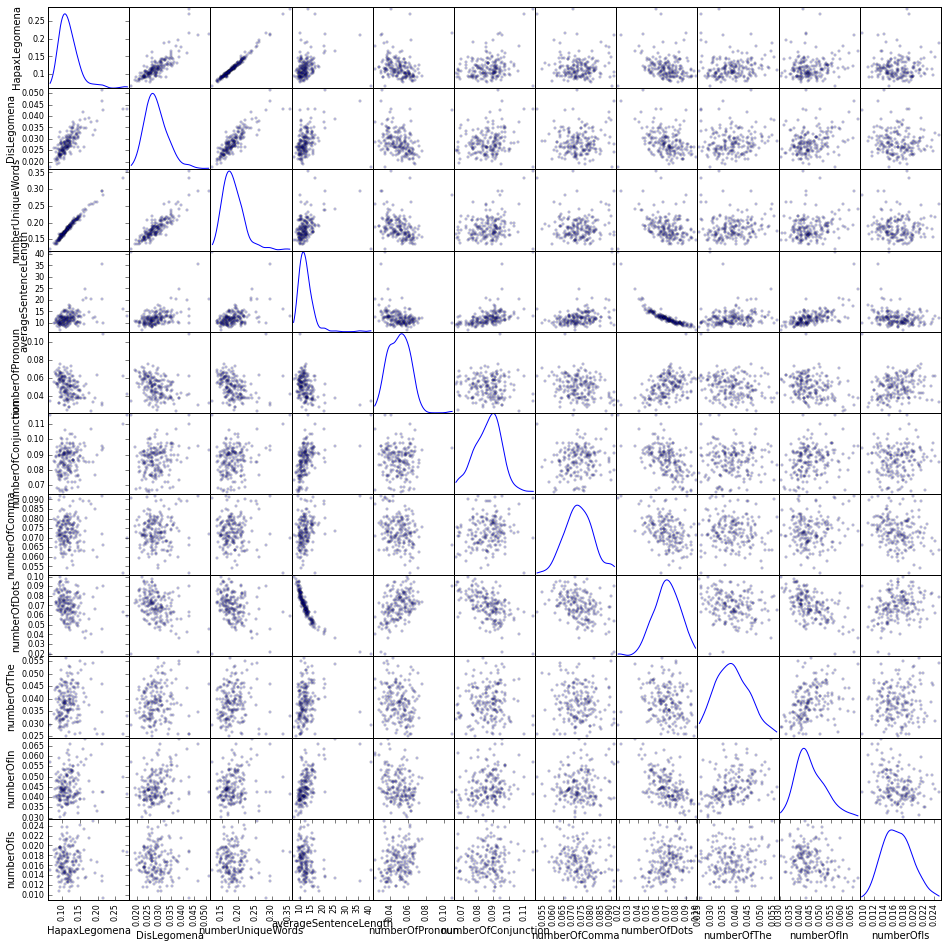

In [16]:
pd.scatter_matrix(df, alpha=0.2, figsize=(16, 16), diagonal='kde')
plt.show()

## Step 2 Construct n-grams using sklearn

In [17]:
title = []
text = []

for act in df.index:
    content = works[act]
    title.append(act)
    text.append(content['text'])


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from __future__ import print_function

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans, AffinityPropagation, AgglomerativeClustering, MeanShift, SpectralClustering, DBSCAN, Birch 
import numpy as np

In [19]:
# excluding stop words, n-grams is an input
def getTfidf(ngram_range):
    count_vect = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X_counts = count_vect.fit_transform(text)

    tfidf_transformer = TfidfTransformer(use_idf=True)
    X_tfidf = tfidf_transformer.fit_transform(X_counts)
    return X_tfidf

In [20]:
def getSVD(X_tfidf, n_components):
    
    svd = TruncatedSVD(n_components = n_components, random_state = randomState)
    lsa = make_pipeline(svd, Normalizer(copy=False))
    X = lsa.fit_transform(X_tfidf)

    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))
    
    return X

    

In [21]:
# Features from n-grams, use fewer components
X_tfidf = getTfidf(ngram_range = (3,5))
X = getSVD(X_tfidf, n_components = 6)
df_ngrams = pd.DataFrame(data=X, index = title, 
                         columns=['n-gram 1st component', 'n-gram 2nd compoent', 'n-gram 3rd', 'n-gram 4th', 'n-gram 5th', 'n-gram 6th',])
df_ngrams.head()

Explained variance of the SVD step: 3%


,n-gram 1st component,n-gram 2nd compoent,n-gram 3rd,n-gram 4th,n-gram 5th,n-gram 6th
MEASURE FOR MEASURE ACT II.,0.529818,-0.394808,-0.717043,-0.182813,-0.083582,-0.094140
"THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT III",-0.308170,0.215696,-0.212219,0.513910,-0.264073,-0.692554
"THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT V.",-0.073108,-0.738725,0.329050,-0.517464,0.186504,-0.195228
KING HENRY THE EIGHTH ACT V.,0.068210,0.101065,-0.186722,-0.137281,-0.944852,-0.196664
THE TRAGEDY OF ROMEO AND JULIET ACT II.,0.343136,0.491263,0.205879,-0.600223,0.232900,-0.428979


## Step 3 Combine n-grams and other features

In [22]:
# Merge all features
df_all = df.join(df_ngrams)
df_all.head()

,HapaxLegomena,DisLegomena,numberUniqueWords,averageSentenceLength,numberOfPronoun,numberOfConjunction,numberOfComma,numberOfDots,numberOfThe,numberOfIn,numberOfIs,n-gram 1st component,n-gram 2nd compoent,n-gram 3rd,n-gram 4th,n-gram 5th,n-gram 6th
act,,,,,,,,,,,,,,,,,
MEASURE FOR MEASURE ACT II.,0.084440,0.019071,0.136920,10.955331,0.067999,0.094699,0.076286,0.072340,0.035644,0.044193,0.018545,0.529818,-0.394808,-0.717043,-0.182813,-0.083582,-0.094140
"THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT III",0.089297,0.023032,0.146323,9.396991,0.057273,0.089789,0.071191,0.084124,0.028452,0.040892,0.017490,-0.308170,0.215696,-0.212219,0.513910,-0.264073,-0.692554
"THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT V.",0.093855,0.021995,0.148254,7.056872,0.058261,0.073539,0.071357,0.099396,0.028711,0.030390,0.017797,-0.073108,-0.738725,0.329050,-0.517464,0.186504,-0.195228
KING HENRY THE EIGHTH ACT V.,0.213043,0.051304,0.295652,20.535714,0.031304,0.093043,0.072174,0.045217,0.046087,0.042609,0.013913,0.068210,0.101065,-0.186722,-0.137281,-0.944852,-0.196664
THE TRAGEDY OF ROMEO AND JULIET ACT II.,0.105476,0.026264,0.168203,9.955494,0.044286,0.091925,0.071109,0.075719,0.039257,0.038698,0.018161,0.343136,0.491263,0.205879,-0.600223,0.232900,-0.428979


## Step 4 Clustering

In [23]:
def getLabels(X, n_clusters = 8, method = 'KMeans'):
    
    if method == 'KMeans':
        cluster = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=500, 
                         n_init=5, random_state = randomState)   
    elif method == 'AffinityPropagation':
        cluster = AffinityPropagation(max_iter=1000)
    elif method == 'AgglomerativeClustering':
        cluster = AgglomerativeClustering(n_clusters=n_clusters)
    elif method == 'Birch':
        cluster = Birch()
    elif method == 'DBSCAN':
        cluster = DBSCAN(random_state = randomState, eps=0.1, min_samples=3)
    elif method == 'SpectralClustering':
        cluster = SpectralClustering(n_clusters=n_clusters)
    elif method == 'MeanShift':
        cluster = MeanShift()
        

    return cluster.fit_predict(X)
        

def printClusters(labels):
    for i in set(labels):
        index = np.squeeze(np.argwhere(labels == i)).tolist()
        print(index)
    
        print(np.array(title)[index])
        print('\n')
        
def print2D(X, x_label, y_label, title, labels):
    plt.figure(figsize = (9,7))
    plt.scatter(X[:,0], X[:,1], c=labels, marker='+', s=100, linewidths=2)
    plt.ylabel(y_label, fontsize=14, fontweight='bold')
    plt.xlabel(x_label, fontsize=14, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')
    
    ax = plt.gca()
    for i in range(len(labels)):
        if labels.tolist().count(labels[i]) <= 3:
            ax.annotate(df_all.index[i], xy=X[i,:], fontweight='bold')
    
    xmin = min(X[:,0])
    xmax = max(X[:,0])
    ymin = min(X[:,1])
    ymax = max(X[:,1])
    
    xrange = xmax - xmin
    yrange = ymax - ymin
    
    xmin = xmin - xrange/10
    xmax = xmax + xrange/10
    
    ymin = ymin - yrange/10
    ymax = ymax + yrange/10
    
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])
    plt.show()  

In [24]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import metrics
from sklearn.manifold import MDS

def clusterDocuments(X, scaled = False, PCA_X = False, n_clusters = 8, 
                     method = 'KMeans', visualize = 'PCA', verbose = True):
        
    
    if scaled:
        X = preprocessing.scale(X)
        
    if PCA_X:
        X = PCA().fit_transform(X)
        
    if PCA_X:
        X_2D_PCA = X[:, 0:2]
    else: 
        X_2D_PCA = PCA(n_components=2).fit_transform(X)
        X_2D_MDS = MDS(n_components=2).fit_transform(X)
        
    labels = getLabels(X, n_clusters, method)
        
    if visualize == 'PCA':
        print2D(X_2D_PCA, 'PCA 1st component', 'PCA 2nd component', method, labels)
    elif visualize == 'MDS':
        print2D(X_2D_MDS, 'MDS 1st component', 'MDS 2nd component', method, labels)
        
    
    print('Number of clusters: ', len(set(labels)))
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, random_state=randomState))
    
    if verbose:
        printClusters(labels)

def visualizeCovariance(X, scaled = False):
    if scaled:
        X = preprocessing.scale(X)
        title = 'Standardized'
    else:
        title = 'Non-Standardized'
    
    pca = PCA(n_components=None)
    pca.fit(X)
    
    covariance = pca.get_covariance()
    
    
    width = 0.5
    ind = np.arange(len(pca.explained_variance_ratio_))

    plt.figure()
    ax = plt.gca()
    ax.bar(ind, pca.explained_variance_ratio_, width, color='gray')
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Components')
    plt.title(title, fontweight='bold')
    plt.show()
    
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(covariance, cmap=plt.cm.Blues, alpha=0.8)
    # Format
    fig = plt.gcf()
    fig.set_size_inches(8, 8)
    # turn off the frame
    ax.set_frame_on(False)
    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(covariance.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(covariance.shape[1]) + 0.5, minor=False)
    # want a more natural, table-like display
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    # Set the labels
    # label source:https://en.wikipedia.org/wiki/Basketball_statistics
    labels = df_all.columns
    # note I could have used nba_sort.columns but made "labels" instead
    ax.set_xticklabels(labels, minor=False)
    ax.set_yticklabels(labels, minor=False)
    # rotate the
    plt.xticks(rotation=90)
    ax.grid(False)
    # Turn off all the ticks
    ax = plt.gca()
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    plt.title(title, fontweight='bold', y=0)
    plt.show()
    

> By only using n-grams + td-idf + SVD (20 components), acts are grouped mainly according to their topics. Acts of the same play go to the same cluster.

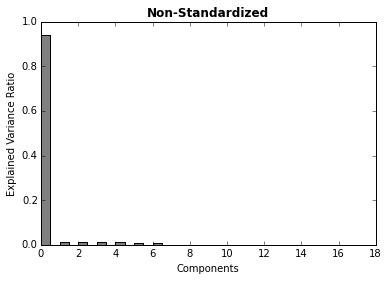

/Users/binyan/Python/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


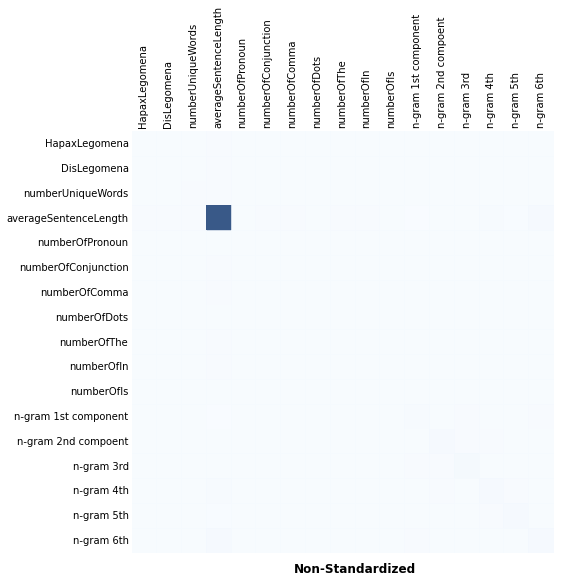

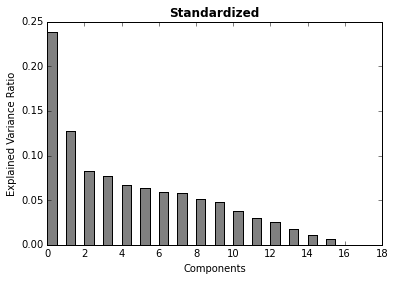

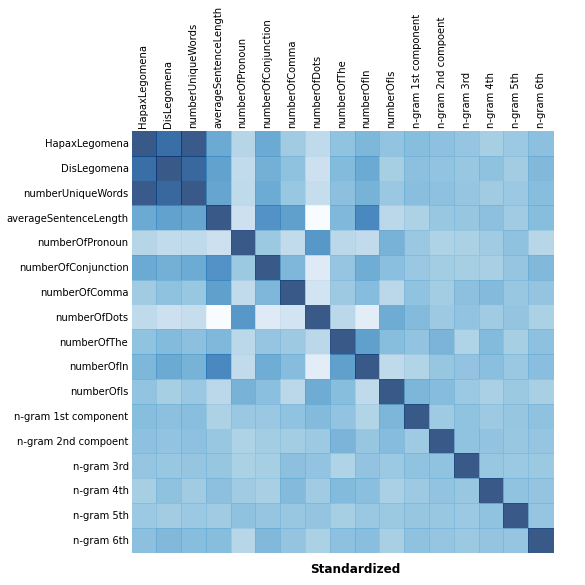

In [25]:
X = df_all.values
visualizeCovariance(X, scaled = False)
visualizeCovariance(X, scaled = True)

### K-Means

In [26]:
# Cluster using all features
X = df_all.values
for n in np.arange(2,30,1):
    clusterDocuments(X, scaled=True, PCA_X = True, n_clusters = n, method = 'KMeans', visualize = 'None', verbose = False)

Number of clusters:  2
Silhouette Coefficient: 0.148
Number of clusters:  3
Silhouette Coefficient: 0.108
Number of clusters:  4
Silhouette Coefficient: 0.066
Number of clusters:  5
Silhouette Coefficient: 0.067
Number of clusters:  6
Silhouette Coefficient: 0.074
Number of clusters:  7
Silhouette Coefficient: 0.068
Number of clusters:  8
Silhouette Coefficient: 0.082
Number of clusters:  9
Silhouette Coefficient: 0.069
Number of clusters:  10
Silhouette Coefficient: 0.068
Number of clusters:  11
Silhouette Coefficient: 0.073
Number of clusters:  12
Silhouette Coefficient: 0.079
Number of clusters:  13
Silhouette Coefficient: 0.074
Number of clusters:  14
Silhouette Coefficient: 0.072
Number of clusters:  15
Silhouette Coefficient: 0.079
Number of clusters:  16
Silhouette Coefficient: 0.084
Number of clusters:  17
Silhouette Coefficient: 0.067
Number of clusters:  18
Silhouette Coefficient: 0.072
Number of clusters:  19
Silhouette Coefficient: 0.076
Number of clusters:  20
Silhouette C

/Users/binyan/Python/anaconda/envs/py34/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


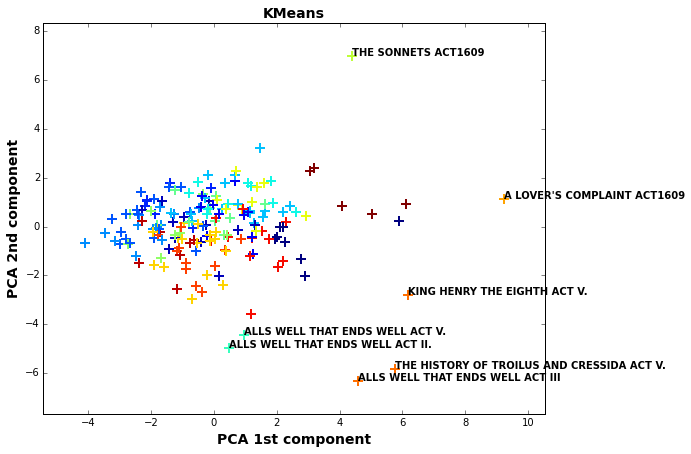

Number of clusters:  20
Silhouette Coefficient: 0.068
[10, 58, 68, 90, 96, 99, 103, 116]
['KING JOHN ACT I. ' 'THE FIRST PART OF HENRY THE SIXTH ACT II.'
 'KING HENRY THE EIGHTH ACT IV.'
 'THE HISTORY OF TROILUS AND CRESSIDA ACT III' 'THE TEMPEST ACT V. '
 'THE FIRST PART OF HENRY THE SIXTH ACT III'
 'KING RICHARD THE SECOND ACT IV.'
 'THE HISTORY OF TROILUS AND CRESSIDA ACT I. ']


[25, 35, 57, 80, 95, 110, 125, 129, 138, 141, 155, 177]
['THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT II.'
 'THE SECOND PART OF KING HENRY THE SIXTH ACT IV.'
 'THE TRAGEDY OF KING LEAR ACT III' 'THE TRAGEDY OF MACBETH ACT III'
 'THE LIFE OF KING HENRY THE FIFTH ACT III'
 'SECOND PART OF KING HENRY IV ACT I. '
 'SECOND PART OF KING HENRY IV ACT V. '
 'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT V. '
 'THE TRAGEDY OF ROMEO AND JULIET ACT I. '
 'SECOND PART OF KING HENRY IV ACT II.' "LOVE'S LABOUR'S LOST ACT II."
 "LOVE'S LABOUR'S LOST ACT V. "]


[13, 18, 56, 86, 87, 105, 120, 139, 149, 157]
['THE LIFE OF TIM

/Users/binyan/Python/anaconda/envs/py34/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [27]:
X = df_all.values
clusterDocuments(X, scaled = True, PCA_X = True, n_clusters = 20, method = 'KMeans', visualize = 'PCA', verbose = True)

> By adding the features of average sentence length, number of unique words normalized by total number of words, fequency of conjunctions, and etc., acts are clustered according to the writing style (need to be verified by visualization).

### Affinity Propagation

In [28]:
print('No mormalization')
clusterDocuments(X, scaled = False, PCA_X=False, method = 'AffinityPropagation', visualize = 'None', verbose = False)
print('Normalize to N(0,1)')
clusterDocuments(X, scaled = True, method = 'AffinityPropagation', visualize = 'None', verbose = False)

No mormalization
Number of clusters:  18
Silhouette Coefficient: 0.130
Normalize to N(0,1)
Number of clusters:  27
Silhouette Coefficient: 0.070


/Users/binyan/Python/anaconda/envs/py34/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


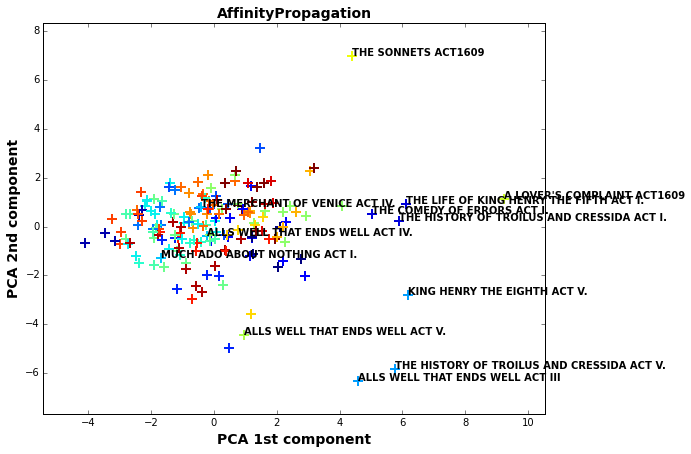

Number of clusters:  26
Silhouette Coefficient: 0.070
[13, 41, 90, 99, 139]
['THE LIFE OF TIMON OF ATHENS ACT V. ' 'THE TEMPEST ACT IV.'
 'THE HISTORY OF TROILUS AND CRESSIDA ACT III'
 'THE FIRST PART OF HENRY THE SIXTH ACT III' 'MEASURE FOR MEASURE ACT I. ']


[2, 19, 119, 141, 178]
['THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT V. '
 'THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT IV.'
 'MUCH ADO ABOUT NOTHING ACT V. ' 'SECOND PART OF KING HENRY IV ACT II.'
 'THE TRAGEDY OF ANTONY AND CLEOPATRA ACT II.']


[6, 21, 116]
['THE LIFE OF KING HENRY THE FIFTH ACT I. ' 'THE COMEDY OF ERRORS ACT I. '
 'THE HISTORY OF TROILUS AND CRESSIDA ACT I. ']


[14, 22, 26, 33, 68, 88, 102, 128, 130, 152, 173]
["THE WINTER'S TALE ACT III" "LOVE'S LABOUR'S LOST ACT III"
 'THE MERRY WIVES OF WINDSOR ACT V. ' "A MIDSUMMER NIGHT'S DREAM ACT IV."
 'KING HENRY THE EIGHTH ACT IV.' "A MIDSUMMER NIGHT'S DREAM ACT V. "
 "LOVE'S LABOUR'S LOST ACT I. " "LOVE'S LABOUR'S LOST ACT IV."
 'KING RICHARD III ACT V. ' 'KING RICH

/Users/binyan/Python/anaconda/envs/py34/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [29]:
clusterDocuments(X, scaled = True, PCA_X = True, method = 'AffinityPropagation')

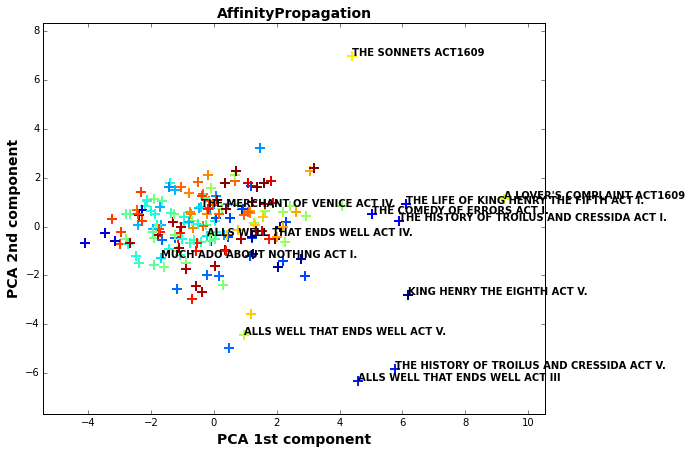

Number of clusters:  27
Silhouette Coefficient: 0.070


/Users/binyan/Python/anaconda/envs/py34/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


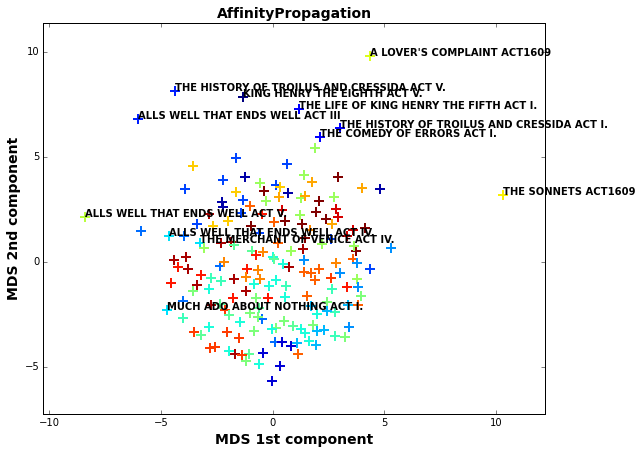

Number of clusters:  27
Silhouette Coefficient: 0.070


In [30]:
clusterDocuments(X, scaled = True, method = 'AffinityPropagation', visualize = 'PCA', verbose = False)
clusterDocuments(X, scaled = True, method = 'AffinityPropagation', visualize = 'MDS', verbose = False)

In [31]:
X = df_all.values
for n in np.arange(2,30,1):
    clusterDocuments(X, scaled=True, PCA_X = True, n_clusters = n, method = 'AgglomerativeClustering', visualize = False, verbose = False)
    

Number of clusters:  2
Silhouette Coefficient: 0.112
Number of clusters:  3
Silhouette Coefficient: 0.085
Number of clusters:  4
Silhouette Coefficient: 0.057
Number of clusters:  5
Silhouette Coefficient: 0.063
Number of clusters:  6
Silhouette Coefficient: 0.062
Number of clusters:  7
Silhouette Coefficient: 0.059
Number of clusters:  8
Silhouette Coefficient: 0.062
Number of clusters:  9
Silhouette Coefficient: 0.061
Number of clusters:  10
Silhouette Coefficient: 0.051
Number of clusters:  11
Silhouette Coefficient: 0.054
Number of clusters:  12
Silhouette Coefficient: 0.054
Number of clusters:  13
Silhouette Coefficient: 0.057
Number of clusters:  14
Silhouette Coefficient: 0.061
Number of clusters:  15
Silhouette Coefficient: 0.065
Number of clusters:  16
Silhouette Coefficient: 0.067
Number of clusters:  17
Silhouette Coefficient: 0.071
Number of clusters:  18
Silhouette Coefficient: 0.067
Number of clusters:  19
Silhouette Coefficient: 0.070
Number of clusters:  20
Silhouette C

/Users/binyan/Python/anaconda/envs/py34/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


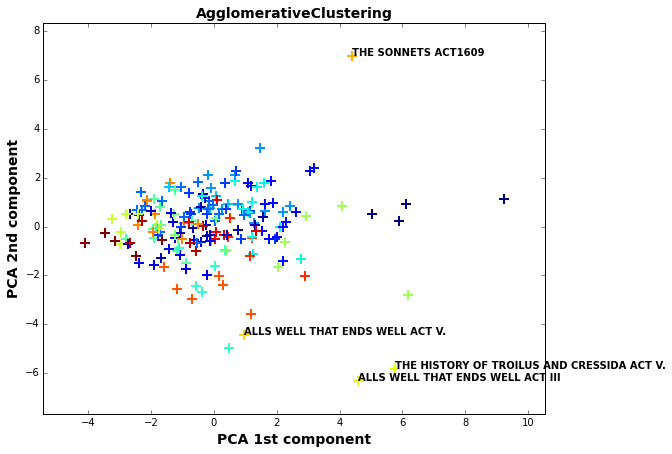

Number of clusters:  23
Silhouette Coefficient: 0.081
[6, 21, 93, 116]
['THE LIFE OF KING HENRY THE FIFTH ACT I. ' 'THE COMEDY OF ERRORS ACT I. '
 "A LOVER'S COMPLAINT ACT1609"
 'THE HISTORY OF TROILUS AND CRESSIDA ACT I. ']


[8, 16, 25, 28, 54, 56, 77, 95, 97, 105, 110, 117, 134, 158, 165]
['AS YOU LIKE IT ACT III' 'MUCH ADO ABOUT NOTHING ACT II.'
 'THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT II.'
 'THE LIFE OF KING HENRY THE FIFTH ACT IV.' 'AS YOU LIKE IT ACT IV.'
 'ALLS WELL THAT ENDS WELL ACT IV.' 'THE MERCHANT OF VENICE ACT I. '
 'THE LIFE OF KING HENRY THE FIFTH ACT III'
 'MUCH ADO ABOUT NOTHING ACT I. ' 'THE MERCHANT OF VENICE ACT IV.'
 'SECOND PART OF KING HENRY IV ACT I. ' 'MUCH ADO ABOUT NOTHING ACT III'
 'THE MERCHANT OF VENICE ACT V. ' 'MEASURE FOR MEASURE ACT III'
 'THE TRAGEDY OF JULIUS CAESAR ACT I. ']


[34, 39, 47, 57, 67, 71, 72, 80, 129, 138, 151, 160, 166]
['THE HISTORY OF TROILUS AND CRESSIDA ACT IV.'
 'THE TRAGEDY OF KING LEAR ACT V. ' 'CYMBELINE ACT V. '
 'THE TR

/Users/binyan/Python/anaconda/envs/py34/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [32]:
clusterDocuments(X, n_clusters = 23, scaled = True, PCA_X = True, method = 'AgglomerativeClustering')

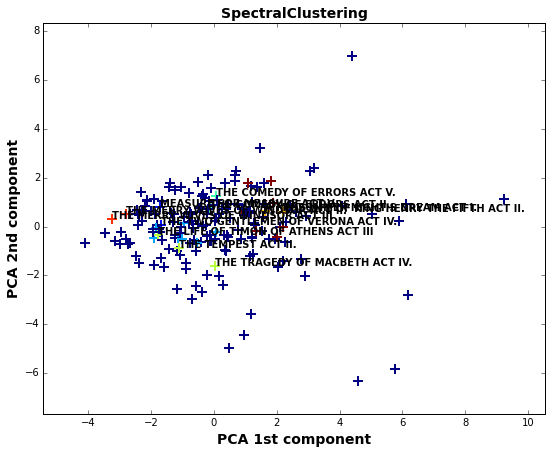

Number of clusters:  8
Silhouette Coefficient: -0.191


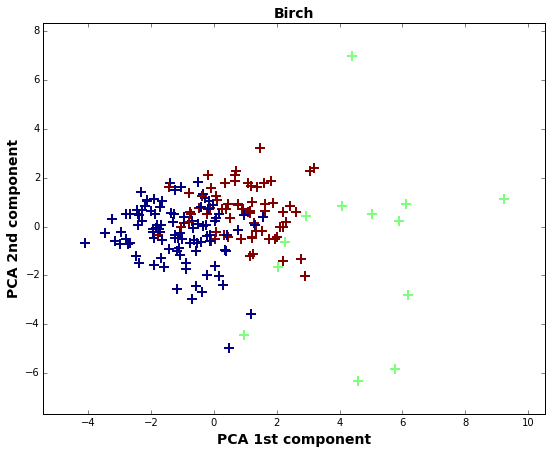

Number of clusters:  3
Silhouette Coefficient: 0.085


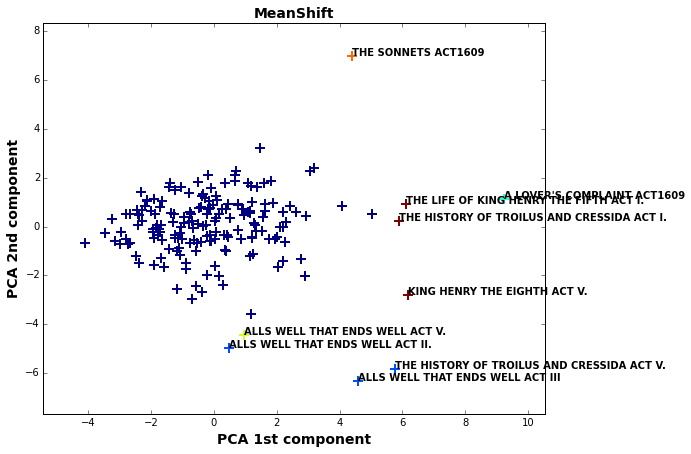

Number of clusters:  6
Silhouette Coefficient: 0.315


/Users/binyan/Python/anaconda/envs/py34/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [33]:
clusterDocuments(X, n_clusters = 8, scaled = True, PCA_X = True, method = 'SpectralClustering', verbose = False)
clusterDocuments(X, scaled = True, PCA_X = True, method = 'Birch', verbose = False)
#clusterDocuments(X, scaled = True, PCA_X = True, method = 'DBSCAN')
clusterDocuments(X, scaled = True, PCA_X = True, method = 'MeanShift', verbose = False)
